# Visualization - 객체지향인터페이스, Multiple Subplot, 텍스트 삽입, 축 조절하기

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## 객체 지향 인터페이스
- Matplotlib는 그래프를 다루는 두 가지의 인터페이스를 제공
  1. MATLAB 스타일로 pyplot 모듈을 사용하는 방식
  2. 객체 지향 인터페이스

- plot의 각 부분을 더 세밀하게 제어할 수 있음
- 복잡한 그래프를 만들거나, 여러 그래프를 하나의 창에 나타내야 할 때 유용

[Document](https://matplotlib.org/stable/api/axes_api.html)

### plot.subplots()
- subplots() 함수를 호출하면 figure (fig)과 subplot (ax) 객체를 생성해서 튜플의 형태로 반환

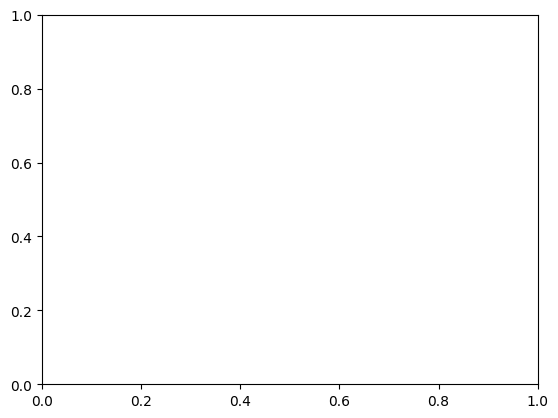

In [ ]:
fig, ax = plt.subplots()
plt.show()

- plt.figure()는 Figure 클래스의 인스턴스를 반환
- Figure 클래스의 인스턴스 fig의 메서드 add_axes()는 fig에 axes를 하나 추가
- add_axes([left, bottom, width, height])의 형태로 0에서 1 사이의 값을 입력

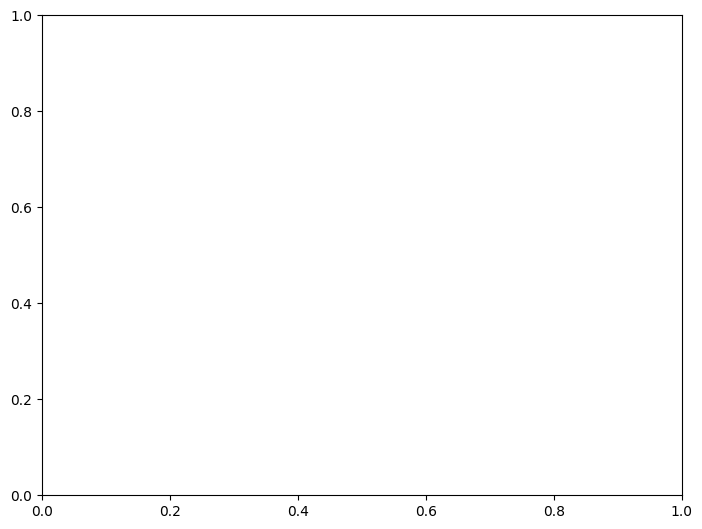

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

plt.show()

### Get, Set method
- get
  - get 메소드들은 그래프의 현재 설정이나 속성 값을 얻기 위해 사용
  - 예를 들어, 축 객체(Axes 객체)의 get_xlim 메소드는 x축의 현재 범위를 반환
- set
  - set 메소드들은 그래프의 속성을 설정하기 위해 사용
  - 예를 들어, set_xlim 메소드는 x축의 범위를 설정하고, set_title 메소드는 축의 제목을 설정



(2.0, 8.0)
Sine & Cosine


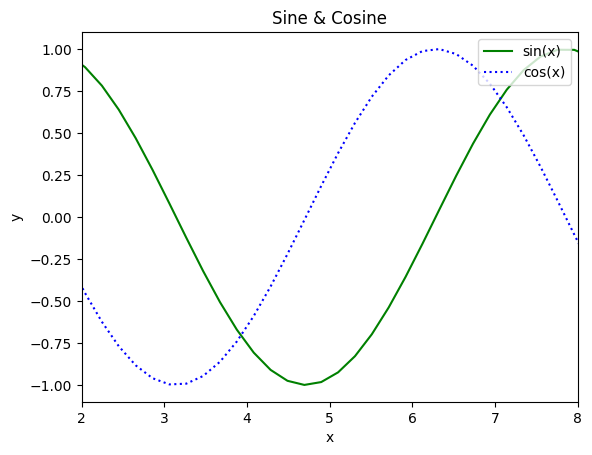

In [ ]:
x = np.linspace(0, 10)

fig, ax = plt.subplots()

ax.plot(x, np.sin(x), '-g', label='sin(x)')
ax.plot(x, np.cos(x), ':b', label='cos(x)')
ax.set_title('Sine & Cosine')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='upper right')
ax.set_xlim([2, 8])

print(ax.get_xlim())
print(ax.get_title())

plt.show()

## Multiple Subplots
- matplotlib.pyplot 모듈의 subplot() 함수는 여러 개의 그래프를 하나의 그림에 그릴 수 있음

### ``plt.axes``
- plt.axes는 그래프의 축을 설정하거나 조절하는 데 사용

1. 축 객체 생성:
  - plt.axes()를 호출하면 새로운 축 객체가 생성됨
  - 이 객체를 사용하여 특정 축에 대한 그래프를 그릴 수 있음
  - 예를 들어, ax = plt.axes()라고 하면 ax 객체를 사용하여 그래프를 커스터마이즈할 수 있음

2. 축의 위치와 크기 조절:
  - plt.axes([left, bottom, width, height]) 형식으로 사용하면, 그래프 축의 위치와 크기를 조절할 수 있음
  - 여기서 left, bottom, width, height는 그래프 축의 위치와 크기를 결정하는 값

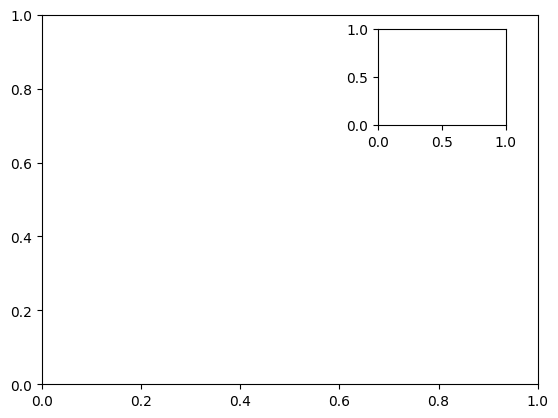

In [ ]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2]) #(0.65,0.65)에서 가로 세로로 0.2씩 되는걸로 그린다.
plt.show()

객체 지향 인터페이스 내에서 이 명령에 해당하는 것은 ``fig.add_axes()``

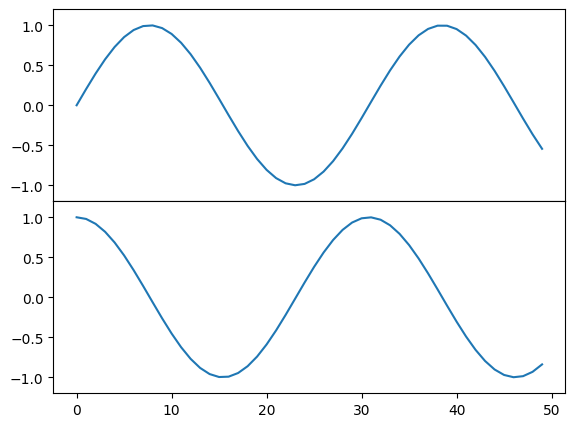

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))
plt.show()

### ``plt.subplot``
- subplot(nrows, ncols, index)

<img src='https://wikidocs.net/images/page/141537/subplot_03.png' width=600>

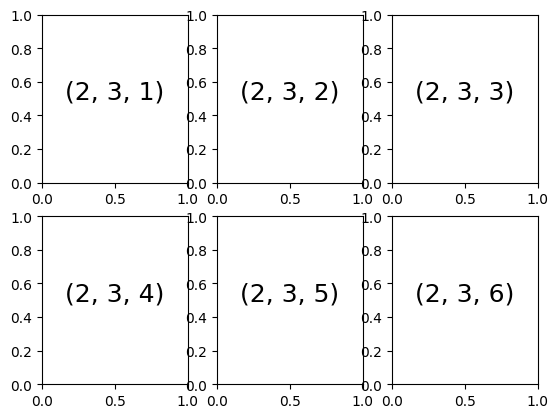

In [ ]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')
plt.show()

- 객체 지향 명령인 fig.add_subplot()을 사용

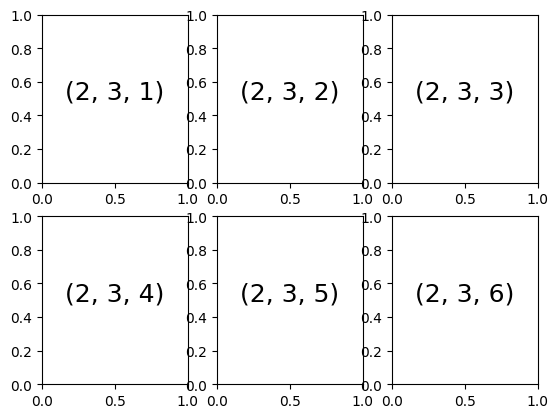

In [ ]:
fig = plt.figure()
# fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')
plt.show()

#### 축 공유하기
- plt.subplot() 함수의 sharex 또는 sharey 파라미터를 사용하면 두 그래프의 축을 공유할 수 있다.

<img src='https://wikidocs.net/images/page/141537/subplot_05.png' width=600>


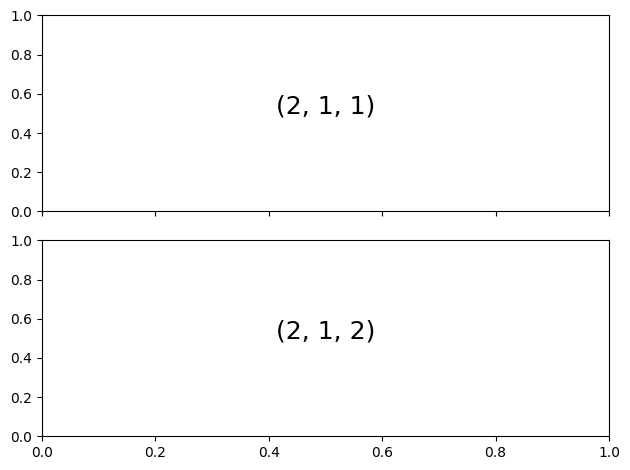

In [ ]:
ax1 = plt.subplot(2, 1, 1)                # nrows=2, ncols=1, index=1
plt.text(0.5, 0.5, str((2, 1, 1)),
         fontsize=18, ha='center')
plt.xticks(visible=False)

ax2 = plt.subplot(2, 1, 2, sharex=ax1)    # nrows=2, ncols=1, index=2
plt.text(0.5, 0.5, str((2, 1, 2)),
         fontsize=18, ha='center')

plt.tight_layout()
plt.show()

###  ``plt.GridSpec``
- 일반 그리드를 넘어 여러 행과 열에 걸친 하위 플롯을 만들때 적합

In [ ]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

plt.subplot(grid[0, 0])
plt.text(0.5, 0.5, '[0, 0]',
         fontsize=18, ha='center')
plt.subplot(grid[0, 1:])
plt.text(0.5, 0.5, '[0, 1:]',
         fontsize=18, ha='center')
plt.subplot(grid[1, :2])
plt.text(0.5, 0.5, '[1, :2]',
         fontsize=18, ha='center')
plt.subplot(grid[1, 2])
plt.text(0.5, 0.5, '[1, 2]',
         fontsize=18, ha='center')

plt.show()

---

## 텍스트 삽입
- text() 함수를 사용하여 그래프의 적절한 위치에 텍스트를 삽입
- text()에 그래프 상의 x 위치, y 위치, 그리고 삽입할 텍스트를 순서대로 입력
<img src='https://wikidocs.net/images/page/141543/addtext05.png' width=600>

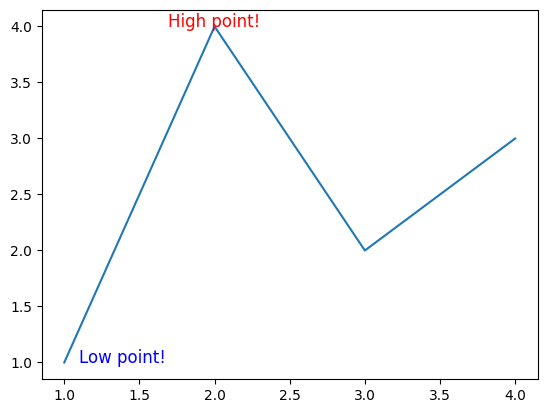

In [ ]:
fig, ax = plt.subplots()

ax.plot([1, 2, 3, 4], [1, 4, 2, 3])

ax.text(1.1, 1, 'Low point!', fontsize=12, color='blue')
ax.text(2, 4, 'High point!', fontsize=12, color='red', ha='center')

plt.show()

### 텍스트 회전
- rotation을 통해 회전

In [ ]:
fig, ax = plt.subplots()

ax.plot([1, 2, 3, 4], [1, 4, 2, 3])

ax.text(1.1, 1, 'Low point!', fontsize=12, color='blue', rotation=65)
ax.text(2, 3.0, 'High point!', fontsize=12, color='red', rotation=-56)

plt.show()

### 텍스트 상자 스타일
- bbox 키워드를 사용해서 텍스트 상자의 스타일을 설정

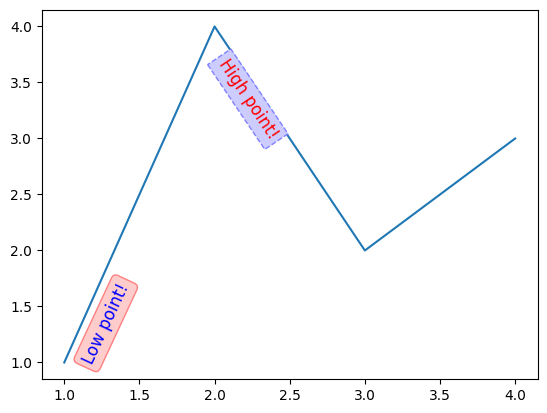

In [ ]:
fig, ax = plt.subplots()

ax.plot([1, 2, 3, 4], [1, 4, 2, 3])

box1 = {'boxstyle': 'round',
        'ec': (1.0, 0.5, 0.5),
        'fc': (1.0, 0.8, 0.8)}

box2 = {'boxstyle': 'square',
        'ec': (0.5, 0.5, 1.0),
        'fc': (0.8, 0.8, 1.0),
        'linestyle': '--'}

ax.text(1.1, 1, 'Low point!', fontsize=12, color='blue', rotation=65, bbox=box1)
ax.text(2, 3.0, 'High point!', fontsize=12, color='red', rotation=-56, bbox=box2)

plt.show()

### 화살표 및 주석
- plt.arrow()와 plt.annotate()
- plt.arrow()의 경우 plot의 다양한 종횡비에 따라 달라질 수 있는 SVG 객체이기 때문에 의도한 대로 결과가 나오지 않을 수 있음
- plt.annotate()를 사용하는 것을 추천

[Document](https://matplotlib.org/stable/users/explain/text/annotations.html)

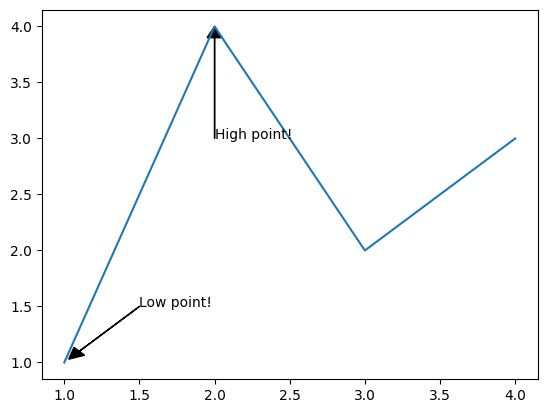

In [ ]:
fig, ax = plt.subplots()

ax.plot([1, 2, 3, 4], [1, 4, 2, 3])

ax.arrow(1.5, 1.5, -0.4, -0.4, head_width=0.1, head_length=0.1, fc='black', ec='black')
ax.text(1.5, 1.5, 'Low point!')

ax.arrow(2, 3, 0, 0.9, head_width=0.1, head_length=0.1, fc='black', ec='black')
ax.text(2, 3, 'High point!')

plt.show()

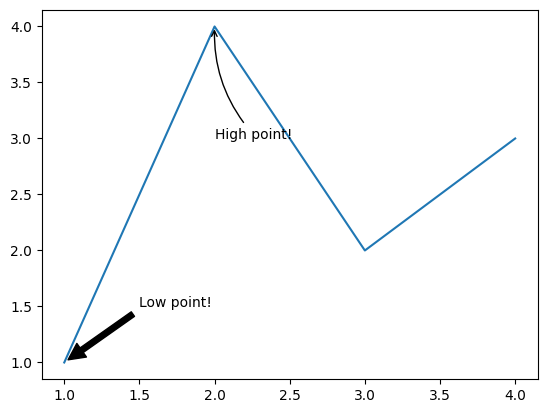

In [ ]:
fig, ax = plt.subplots()

ax.plot([1, 2, 3, 4], [1, 4, 2, 3])


ax.annotate('Low point!', xy=(1, 1), xytext=(1.5, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('High point!', xy=(2, 4), xytext=(2, 3),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))

plt.show()

<img src='https://matplotlib.org/stable/_images/sphx_glr_connectionstyle_demo_001.png'>

---

## 축 조절하기

### 스케일 바꾸기

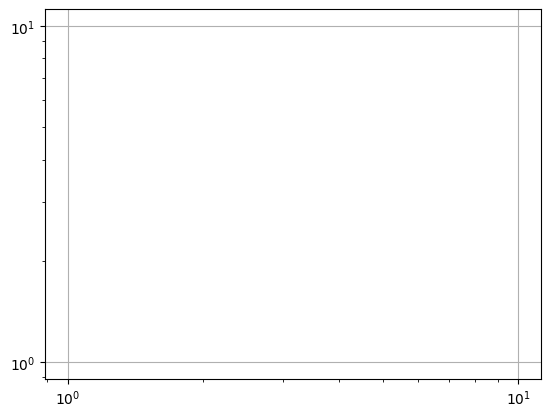

In [ ]:
ax = plt.axes(xscale='log', yscale='log')
ax.grid()
plt.show()

### 축, 레이블 숨기기

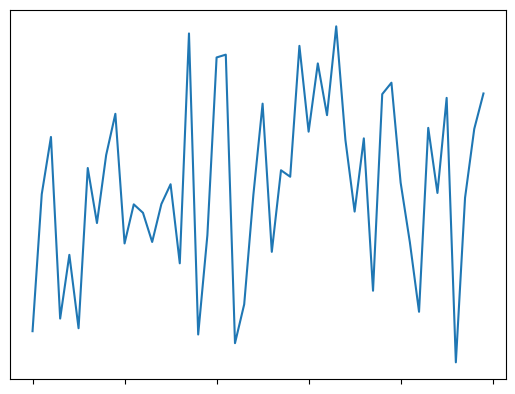

In [ ]:
ax = plt.axes()
ax.plot(np.random.rand(50))

ax.yaxis.set_major_locator(plt.NullLocator())    # 눈금 제거
ax.xaxis.set_major_formatter(plt.NullFormatter())    # 레이블 제거
plt.show()

### 축 위치 조절하기

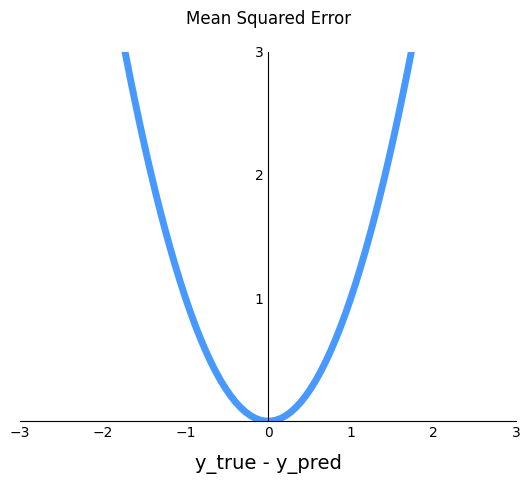

In [ ]:
fig, ax = plt.subplots()

ax.set_title('Mean Squared Error', pad=20)
ax.set_xlim(-3, 3)
ax.set_ylim(0, 3)
ax.set_xticks([-3, -2, -1, 0, 1, 2, 3])
ax.set_yticks([1, 2, 3])

ax.spines['left'].set_position('center')        # 왼쪽 축을 가운데 위치로 이동
ax.spines['right'].set_visible(False)          # 오른쪽 축을 보이지 않도록
ax.spines['top'].set_visible(False)            # 위 축을 보이지 않도록
ax.spines['bottom'].set_position(('data', 0))   # 아래 축을 데이터 0의 위치로 이동
ax.tick_params('both', length=0)                # Tick의 눈금 길이 0

x = np.linspace(-3, 3, 100)
ax.set_xlabel('y_true - y_pred', fontdict={'fontsize': 14}, labelpad=10)
ax.plot(x, x**2, color='#4799FF', linewidth=5)

plt.show()

### 이중 y축 표시하기
- 두 종류의 데이터를 동시에 하나의 그래프에 표시하기 위해 이중 축을 표시
- twinx()를 통해 기존의 ax와 x축을 공유하는 새로운 Axes 객체 생성
<img src='https://wikidocs.net/images/page/141535/double_y_axis_05.png' width=600>

In [ ]:
x = np.arange(0, 3)
y1 = x + 1
y2 = -x - 1

fig, ax1 = plt.subplots()
ax1.plot(x, y1, color='green')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='deeppink')

plt.show()

#### 축 레이블 표시
<img src='https://wikidocs.net/images/page/141535/double_y_axis_06.png' width=600>

In [ ]:
x = np.arange(0, 3)
y1 = x + 1
y2 = -x - 1

fig, ax1 = plt.subplots()
ax1.set_xlabel('X-Axis')
ax1.set_ylabel('1st Y-Axis')
ax1.plot(x, y1, color='green')

ax2 = ax1.twinx()
ax2.set_ylabel('2nd Y-Axis')
ax2.plot(x, y2, color='deeppink')

plt.show()

### 눈금 수 줄이기 또는 늘리기

In [ ]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)
plt.show()

In [ ]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
plt.show()

### 눈금 포맷 변경
- 눈금의 레이블, 크기, 색상, 방향 등을 조정할 수 있으며, 특히 눈금 레이블의 포매팅을 변경하여 축의 표현을 사용자가 원하는 형태로 맞춤 설정할 수 있음

[Document](https://matplotlib.org/stable/api/ticker_api.html)

In [ ]:
# 사인 및 코사인 곡선 그리기
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')

# grid, legend, and limits 설정하기
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi)
plt.show()

#### 눈금의 위치와 개수 조정
- set_major_locator와 set_minor_locator 메소드를 사용하여 주요 눈금과 부차적인 눈금의 위치를 조정할 수 있음

In [ ]:
# 사인 및 코사인 곡선 그리기
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')

# grid, legend, and limits 설정하기
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi)

ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
plt.show()

#### 눈금 레이블 formatting 변경

In [ ]:
def format_func(value, tick_number):
    # pi/2 배수 수 찾기
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)

# 사인 및 코사인 곡선 그리기
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')

# grid, legend, and limits 설정하기
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi)

ax.xaxis.set_major_locator(plt.MultipleLocator(base=np.pi/2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(base=np.pi/4))

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

plt.show()

#### 눈금의 스타일 변경
- tick_params 메소드를 사용하여 눈금의 크기, 색상, 방향 등을 변경할 수 있음

In [ ]:
# 사인 및 코사인 곡선 그리기
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')

# grid, legend, and limits 설정하기
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi)

ax.xaxis.set_major_locator(plt.MultipleLocator(base=np.pi/2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(base=np.pi/4))

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

ax.tick_params(axis='x', direction='inout', length=6, width=2, colors='r')

plt.show()

#### Summary of Formatters and Locators

Locator class        | Description
---------------------|-------------
``NullLocator``      | No ticks
``FixedLocator``     | Tick locations are fixed
``IndexLocator``     | Locator for index plots (e.g., where x = range(len(y)))
``LinearLocator``    | Evenly spaced ticks from min to max
``LogLocator``       | Logarithmically ticks from min to max
``MultipleLocator``  | Ticks and range are a multiple of base
``MaxNLocator``      | Finds up to a max number of ticks at nice locations
``AutoLocator``      | (Default.) MaxNLocator with simple defaults.
``AutoMinorLocator`` | Locator for minor ticks

Formatter Class       | Description
----------------------|---------------
``NullFormatter``     | No labels on the ticks
``IndexFormatter``    | Set the strings from a list of labels
``FixedFormatter``    | Set the strings manually for the labels
``FuncFormatter``     | User-defined function sets the labels
``FormatStrFormatter``| Use a format string for each value
``ScalarFormatter``   | (Default.) Formatter for scalar values
``LogFormatter``      | Default formatter for log axes

---